In [ ]:
include(joinpath("..","src","setup.jl"))
datadir = joinpath("..","data","count_lengths","run_2018-11-26")
PlotAxes.set_backend!(:ggplot2)
revise()

In [75]:
params = load_params(joinpath(datadir,"params.jld2"))
params.pindex = 1:size(params,1)
settings = joinpath("..","src","settings.toml")
settings = TOML.parsefile(settings)
settings["stimulus"]["repeats"] = 18

settings["nmf"]["delta"] = 0.01
settings["nmf"]["maxiter"] = 1000
settings["nmf"]["tol"] = 1e-8
settings["nmf"]["reuse_solution"] = false # note: reusing the solution across frames leads to 0-matrix solution about 3 seconds in

# inference seems to be determined note by T seconds worth of observations by on the absolute number of observations
# so we need to reduce the strengths (which are in units of T seconds worth of frames) on the basis of how many more
# frames the smaller delta created
settings["track"]["analyze"]["source_prior_strengths"] = [1.5,2.0] 

2-element Array{Float64,1}:
 1.5
 2.0

In [76]:
p = copy(params[select_params(params,f_c_a=15,f_c_m=130,Δf=6),:])
p.f_c_σ .= 0.0
p.f_c_m .= 0.0
p.f_c_a .= 0.0

1-element Array{Float64,1}:
 0.0

In [77]:
result = bistable_model(p,settings,interactive=true);

Temporal Coherence Analysis: 100%|██████████████████████| Time: 0:00:03
┌ Info: 0.23% of frames (n = 1) failed to fully converge to a solution.
└ @ AuditoryBistabilityLE /Users/davidlittle/Documents/juliadev/AuditoryBistabilityLE/src/nmf.jl:46
Source Tracking (multi-prior): 100%|████████████████████| Time: 0:00:02


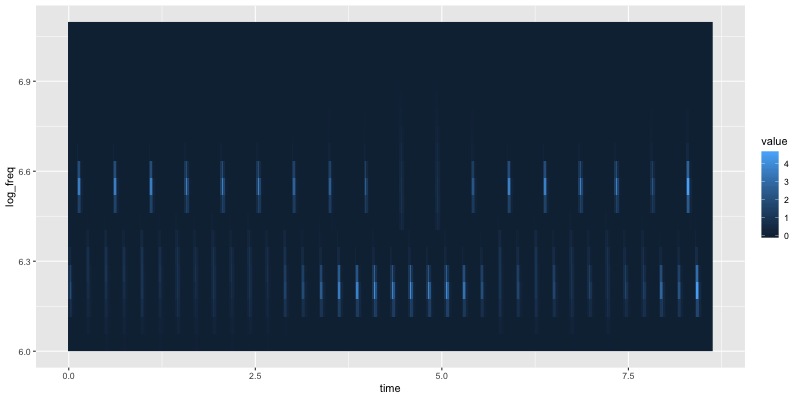

RObject{VecSxp}


In [78]:
plotaxes(result.primary_source,:time,:freq => logrange,quantize=(500,128))

┌ Warning: Ignoring phase of complex value
└ @ PlotAxes /Users/davidlittle/.julia/packages/PlotAxes/OxaSg/src/ggplot2.jl:23


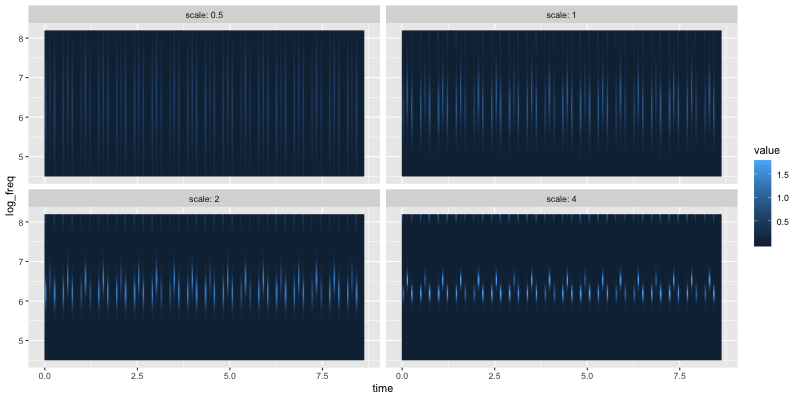

RObject{VecSxp}


In [79]:
plotaxes(result.cortical.result[0s .. 10s],quantize=(500,128,10))

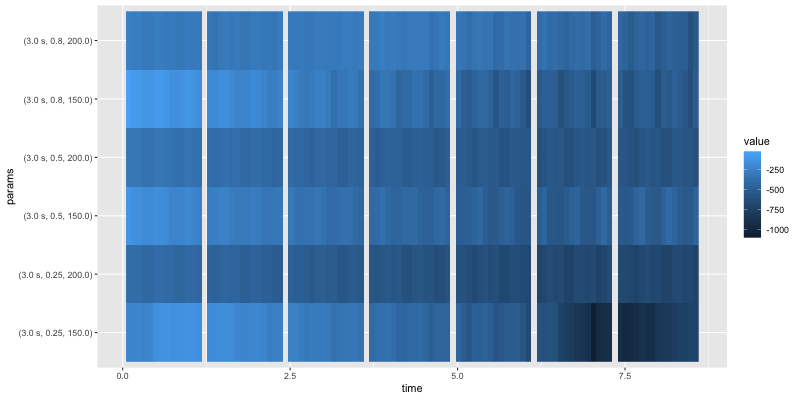

RObject{VecSxp}


In [81]:
plotaxes(result.sources.result[0s .. 10s])

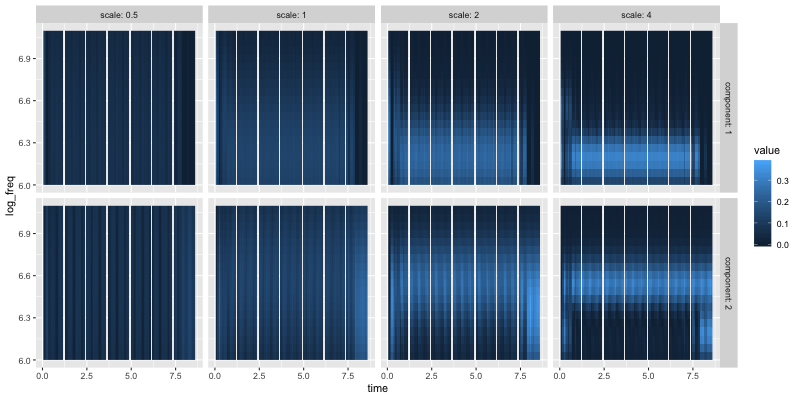

RObject{VecSxp}


In [82]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.25, 150.0))][:,:,:,0s .. 10s],:time,:freq => logrange,:scale,:component)

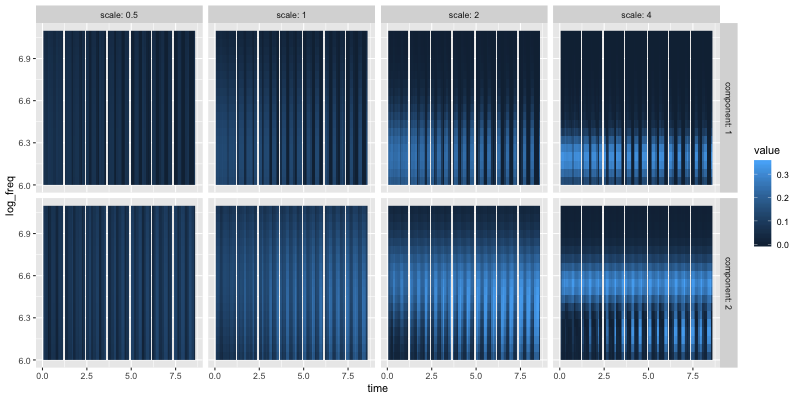

RObject{VecSxp}


In [83]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.5, 150.0))][:,:,:,0s .. 10s],:time,:freq => logrange,:scale,:component)

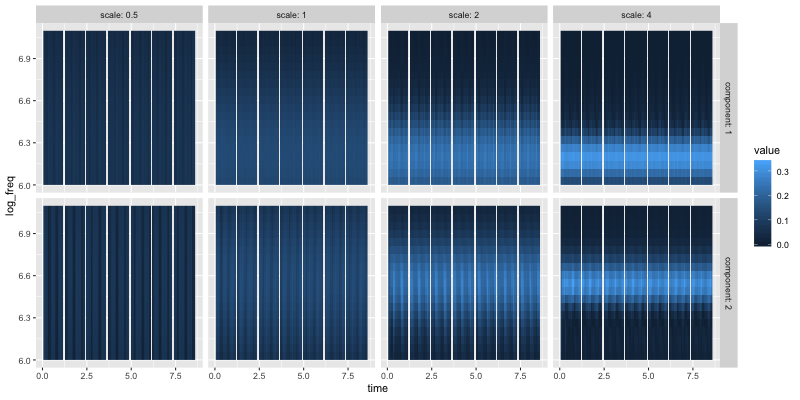

RObject{VecSxp}


In [84]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.8, 150.0))][:,:,:,0s .. 10s],:time,:freq => logrange,:scale,:component)

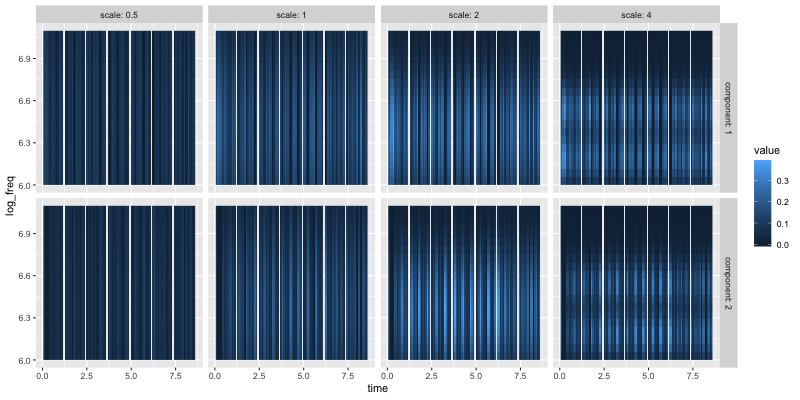

RObject{VecSxp}


In [85]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.25, 200.0))][:,:,:,0s .. 10s],:time,:freq => logrange,:scale,:component)

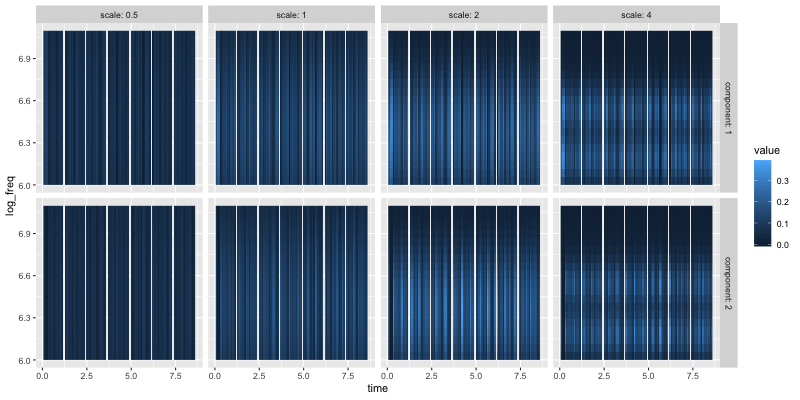

RObject{VecSxp}


In [86]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.5, 200.0))][:,:,:,0s .. 10s],:time,:freq => logrange,:scale,:component)

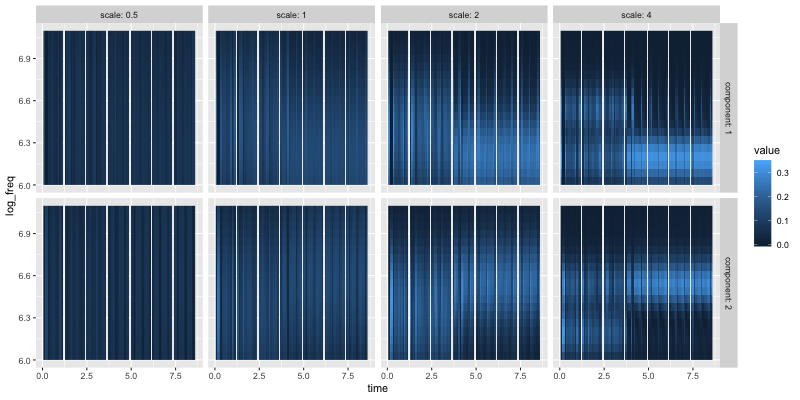

RObject{VecSxp}


In [87]:
plotaxes(result.sources.tracks[atvalue((3.0s, 0.8, 200.0))][:,:,:,0s .. 10s],:time,:freq => logrange,:scale,:component)

# Object bistability

In [94]:
p = copy(params[select_params(params,t_c_a=5,t_c_m=5,Δf=6),:])
settings["stimulus"]["repeats"] = 36

36

In [95]:
p.Δf .= 6
results = []
@showprogress for i in 1:250
    with_logger(NullLogger()) do
        len,val = bistable_model(p,settings,intermediate_results=true).percepts.counts
        push!(results,DataFrame(length=len,response=val.+1,run=i))
    end
end
buildup = vcat(results...);

Progress: 100%|█████████████████████████████████████████| Time: 0:45:05


In [96]:
Δ = 0.05
sdf = buildup_mean(buildup,delta=Δ,length=9);

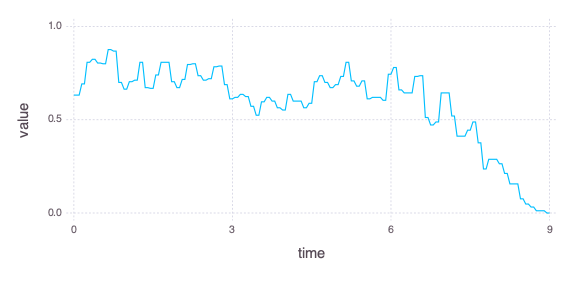

false

In [97]:
draw(PNG(6inch,3inch),plot(sdf,x=:time,y=:value,Geom.line,Coord.cartesian(ymax=1.0,xmax=9)))

In [98]:
Δ = 0.05
sdf = buildup_image(buildup,delta=Δ,length=9);

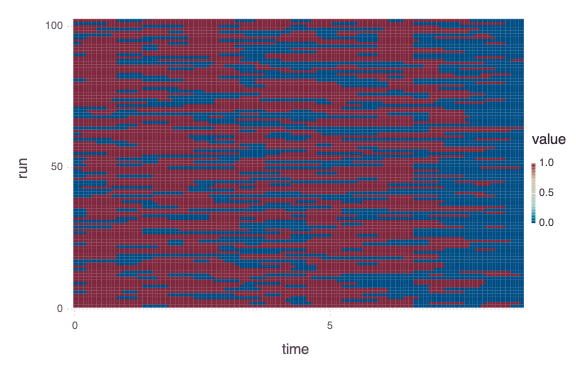

false

In [99]:
draw(PNG(6inch,4inch),plot(sdf,x=:time,y=:run,color=:value,Geom.rectbin,Coord.cartesian(ymin=0,ymax=100,xmin=0,xmax=8.64)))